## ESTUDIO DE CASO: READMISIÓN DE PACIENTES

Curso: Machine Learning con Python

----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------

**1. Carga de modulos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Carga de bases de datos**

In [2]:
bd_diabetic_data = pd.read_csv('data/diabetic_data.csv')
bd_AdmissionSource = pd.read_csv('data/admission_source_id.csv')
bd_admission_type_id = pd.read_csv('data/admission_type_id.csv')
bd_discharge_disposition_id = pd.read_csv('data/discharge_disposition_id.csv')

In [3]:
bd_diabetic_data.shape

(101766, 50)

In [5]:
bd_diabetic_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
bd_diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

*Comprobar correcta lectura de datos*

In [6]:
bd_AdmissionSource.head(10)

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [8]:
bd_admission_type_id.head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,None
6,7,Trauma Center
7,8,Not Mapped


In [9]:
bd_discharge_disposition_id.head(10)

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


*Juntamos las bases de datos*

In [10]:
bd_diabetes1 = pd.merge(bd_diabetic_data,bd_AdmissionSource, on = "admission_source_id", how = "left")
bd_diabetes2 = pd.merge(bd_diabetes1,bd_admission_type_id, on = "admission_type_id", how = "left" )
bd_full = pd.merge(bd_diabetes2,bd_discharge_disposition_id, on = "discharge_disposition_id", how  = "left")

In [11]:
bd_full.shape

(101766, 53)

*Renombramos las variables por buenas prácticas*

In [12]:
columnsNameDiabetes = ["encounter_id", "patient_nbr", "race", "gender", "age", "weight", "admission_type_id", "discharge_disposition_id",
                       "admission_source_id", "time_in_hospital", "payer_code", "medical_specialty", "num_lab_procedures", "num_procedures",
                       "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "diag_1", "diag_2", "diag_3",
                       "number_diagnoses", "max_glu_serum", "a1c_result", "metformin", "repaglinide", "nateglinide", "chlorpropamide",
                       "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",
                       "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide_metformin", "glipizide_metformin",
                       "glimepiride_pioglitazone", "metformin_rosiglitazone", "metformin_pioglitazone", "change", "diabetes_med", "readmitted",
                       "description_x", "description_y", "description"]

In [13]:
bd_full.columns = columnsNameDiabetes

**3. Analizamos la variable target**

In [14]:
print("Número de filas: " + str(bd_full.shape[0]))
print("Número de columnas: " + str(bd_full.shape[1]))

Número de filas: 101766
Número de columnas: 53


In [15]:
bd_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [16]:
bd_full.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetes_med,readmitted,description_x,description_y,description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


In [17]:
bd_full["readmitted"].describe()
bd_full.groupby("readmitted").size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

IMPORTANTE: Conocer el objetivo de estudio

In [18]:
columnTarget = "target"
bd_full[columnTarget] = bd_full["readmitted"].map({"NO":0,"<30":1,">30":1})

In [19]:
bd_full.groupby(columnTarget).size()/bd_full.shape[0]

target
0    0.539119
1    0.460881
dtype: float64

C:\Users\Administrativo\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


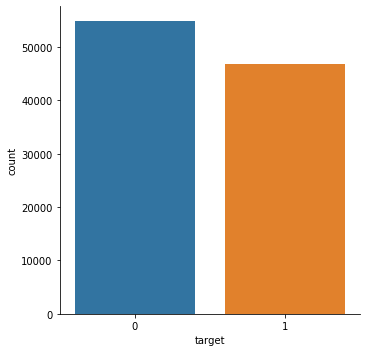

In [20]:
sns.factorplot('target',data=bd_full,kind="count")

In [21]:
pd.crosstab(bd_full["readmitted"],bd_full["target"])

target,0,1
readmitted,,
<30,0,11357
>30,0,35545
NO,54864,0


**4. Diferenciamos los tipos de variables por buenas practicas**

In [22]:
columnsNumeric = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency",
                   "number_inpatient", "number_diagnoses"]
columnsString = ["race", "gender", "age", "weight", "payer_code", "medical_specialty", "diag_1", "diag_2", "diag_3",
                   "max_glu_serum", "a1c_result", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",
                   "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide",
                   "examide", "citoglipton", "insulin", "glyburide_metformin", "glipizide_metformin", "glimepiride_pioglitazone", "metformin_rosiglitazone",
                   "metformin_pioglitazone", "change", "diabetes_med", "description_x", "description_y", "description"]
columnTarget = "target"

*Estudiamos las variables numericas*

In [23]:
bd_full[columnsNumeric].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


*analizamos las varianzas mas cercanas a cero*

In [24]:
bd_full[columnsNumeric].var().sort_values(ascending = False)

num_lab_procedures    387.080530
num_medications        66.057332
time_in_hospital        8.910868
number_diagnoses        3.738810
num_procedures          2.909777
number_outpatient       1.605961
number_inpatient        1.594824
number_emergency        0.865779
dtype: float64

*Hacemos un analisis de frecuencia a la variable: number_emergency porqeu tiene la varianza mas pequeña*

In [25]:
bd_full.groupby("number_emergency").size()/bd_full["number_emergency"].shape[0]

number_emergency
0     0.888145
1     0.075438
2     0.020066
3     0.007124
4     0.003675
5     0.001887
6     0.000924
7     0.000717
8     0.000491
9     0.000324
10    0.000334
11    0.000226
12    0.000098
13    0.000118
14    0.000029
15    0.000029
16    0.000049
18    0.000049
19    0.000039
20    0.000039
21    0.000020
22    0.000059
24    0.000010
25    0.000020
28    0.000010
29    0.000010
37    0.000010
42    0.000010
46    0.000010
54    0.000010
63    0.000010
64    0.000010
76    0.000010
dtype: float64

*Revisamos las frecuencias de las variables numéricas*

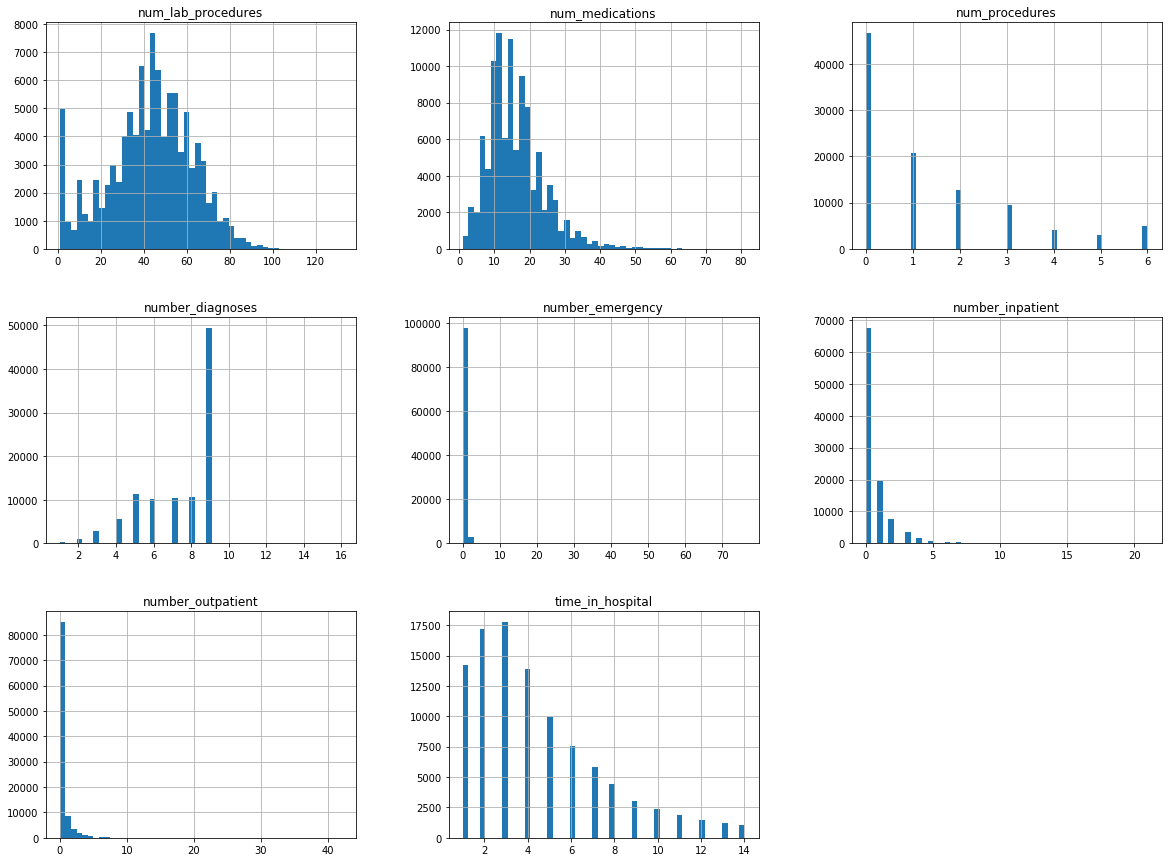

In [26]:
bd_full[columnsNumeric].hist(bins = 50, figsize=(20,15))
plt.show()

In [27]:
def frecuencia (x):
    frec = bd_full.groupby(x).size()/bd_full[x].shape[0]
    print(frec)
    print("\n")

*A las variables "number_outpatient", "number_emergency" y "number_inpatient" hacemos un analisis de frecuencia*

In [28]:
print(frecuencia("number_outpatient"))
print(frecuencia("number_emergency"))
print(frecuencia("number_inpatient"))

number_outpatient
0     0.835515
1     0.083987
2     0.035316
3     0.020066
4     0.010799
5     0.005238
6     0.002977
7     0.001523
8     0.000963
9     0.000816
10    0.000560
11    0.000413
12    0.000295
13    0.000305
14    0.000275
15    0.000197
16    0.000147
17    0.000079
18    0.000049
19    0.000029
20    0.000069
21    0.000069
22    0.000049
23    0.000020
24    0.000029
25    0.000020
26    0.000020
27    0.000029
28    0.000010
29    0.000020
33    0.000020
34    0.000010
35    0.000020
36    0.000020
37    0.000010
38    0.000010
39    0.000010
40    0.000010
42    0.000010
dtype: float64


None
number_emergency
0     0.888145
1     0.075438
2     0.020066
3     0.007124
4     0.003675
5     0.001887
6     0.000924
7     0.000717
8     0.000491
9     0.000324
10    0.000334
11    0.000226
12    0.000098
13    0.000118
14    0.000029
15    0.000029
16    0.000049
18    0.000049
19    0.000039
20    0.000039
21    0.000020
22    0.000059
24    0.000010
25    0.00002

*Viendo presencia de valores perdidos*

In [29]:
for x in columnsNumeric:
    print(x)
    print(bd_full.loc[(pd.isna(bd_full[x]))].shape[0])
    print("\n")

time_in_hospital
0


num_lab_procedures
0


num_procedures
0


num_medications
0


number_outpatient
0


number_emergency
0


number_inpatient
0


number_diagnoses
0




*Viendo presencia de atípicos*

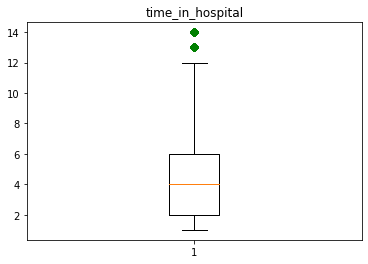

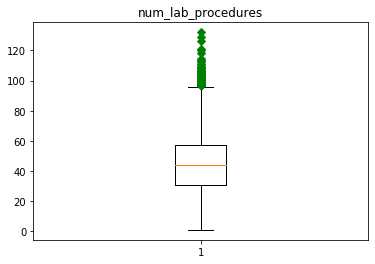

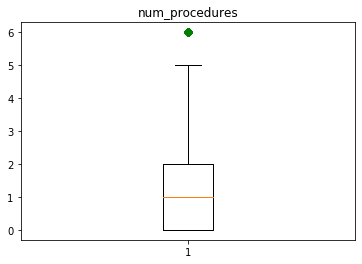

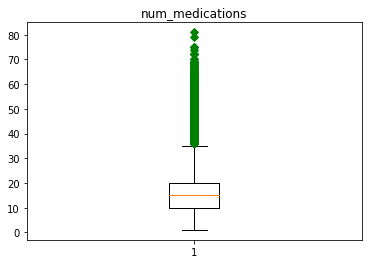

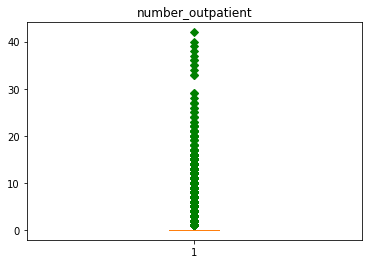

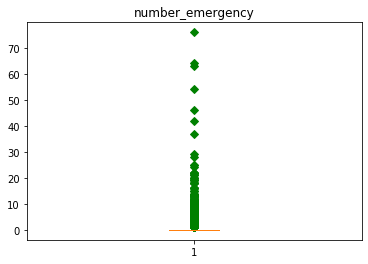

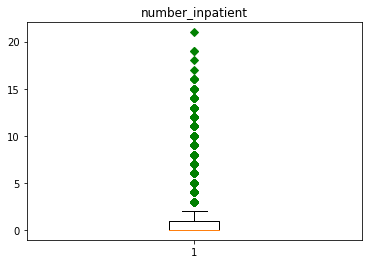

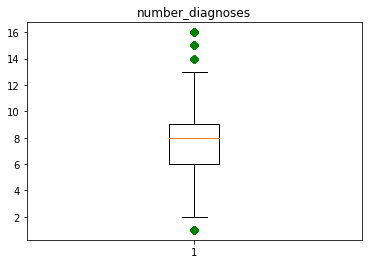

In [30]:
for x in bd_full[columnsNumeric].columns:
    plt.title(x)
    plt.boxplot(bd_full[x] , 0, 'gD')
    plt.show()

In [31]:
# Función de Identificar Outliers:
def calcularOutliars(x):
  Q01 = x.quantile(0.25)
  Q03 = x.quantile(0.75)
  IQR = Q03 - Q01
  a = (x < (Q01 - 1.5 * IQR)) | (x > (Q03 + 1.5 * IQR))
  numOutliars = a[a == True].shape[0]
  pornumOutliars = numOutliars/x.shape[0]
  return pornumOutliars

In [32]:
calcularOutliars(bd_full["time_in_hospital"])

0.022129198357015115

In [33]:
for x in columnsNumeric:
    print(x)
    print(calcularOutliars(bd_full[x]))
    print("\n")

time_in_hospital
0.022129198357015115


num_lab_procedures
0.0014051844427411906


num_procedures
0.04868030579957943


num_medications
0.025126270070554017


number_outpatient
0.16448519151779573


number_emergency
0.11185464693512569


number_inpatient
0.0692667492089696


number_diagnoses
0.0027612365623096123




*Observamos que se acumulan en 0 pero no en un 90% (no en la gran mayoria), lo tendremos en cuenta en la exploración de datos para descartarlas de ser necesario con más evidencia (mean encoding)*

**Para las variables categoricas vemos sus distribuciones**

In [34]:
#Corregimos las variables que no están definidas de forma correcta como NaN (nan)
for x in columnsString:
    print(x)
    print(bd_full.groupby(x).size())
    print("\n")

race
race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
dtype: int64


gender
gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64


age
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64


weight
weight
>200             3
?            98569
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
dtype: int64


payer_code
payer_code
?     40256
BC     4655
CH      146
CM     1937
CP     2533
DM      549
FR        1
HM     6274
MC    32439
MD     3532
MP       79
OG     1033
OT       95
PO      592
SI       55
SP     5007
UN     2448
WC      135
dtype: int64


medical_specialty
medical_specialty
?         

In [35]:
#Reemplazamos los valores extraños
bd_full["race"] = bd_full["race"].replace("?",np.nan)
bd_full["gender"] = bd_full["gender"].replace("Unknown/Invalid",np.nan)
bd_full["weight"] = bd_full["weight"].replace("?",np.nan)
bd_full["payer_code"] = bd_full["payer_code"].replace("?",np.nan)
bd_full["medical_specialty"] = bd_full["medical_specialty"].replace("?",np.nan)
bd_full["medical_specialty"] = bd_full["medical_specialty"].replace("?",np.nan)

In [36]:
#Viendo presencia de valores perdidos
for x in columnsString:
    print(x)
    print(bd_full.loc[(pd.isna(bd_full[x]))].shape[0]/bd_full[x].shape[0])
    print("\n")

race
0.022335554114340742


gender
2.947939390366134e-05


age
0.0


weight
0.9685847925633315


payer_code
0.395574160328597


medical_specialty
0.49082208203132677


diag_1
0.0


diag_2
0.0


diag_3
0.0


max_glu_serum
0.0


a1c_result
0.0


metformin
0.0


repaglinide
0.0


nateglinide
0.0


chlorpropamide
0.0


glimepiride
0.0


acetohexamide
0.0


glipizide
0.0


glyburide
0.0


tolbutamide
0.0


pioglitazone
0.0


rosiglitazone
0.0


acarbose
0.0


miglitol
0.0


troglitazone
0.0


tolazamide
0.0


examide
0.0


citoglipton
0.0


insulin
0.0


glyburide_metformin
0.0


glipizide_metformin
0.0


glimepiride_pioglitazone
0.0


metformin_rosiglitazone
0.0


metformin_pioglitazone
0.0


change
0.0


diabetes_med
0.0


description_x
0.0


description_y
0.0


description
0.0




In [37]:
#Retiramos las variables con muchos NAs
columnsString.remove('weight')
columnsString.remove('payer_code')
columnsString.remove('medical_specialty')

bd_full = bd_full.drop(['weight'],axis = 1)
bd_full = bd_full.drop(['payer_code'],axis = 1)
bd_full = bd_full.drop(['medical_specialty'],axis = 1)

In [38]:
#Como el porcentaje de nan es menor al 1% eliminamos los casos perdidos para un mejor ajuste
bd_full =  bd_full.dropna()

In [39]:
bd_full.shape

(99492, 51)

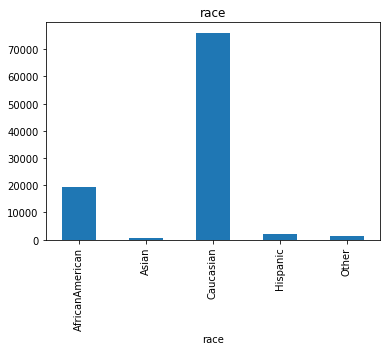

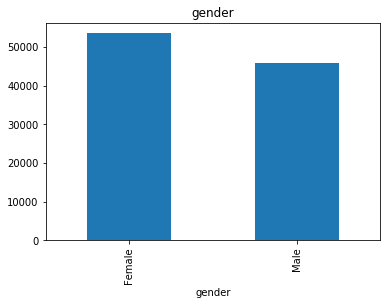

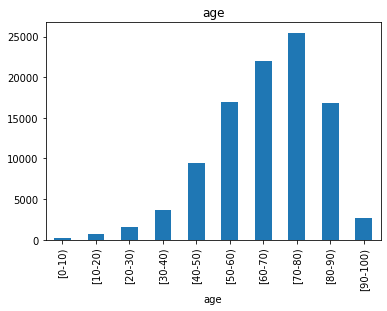

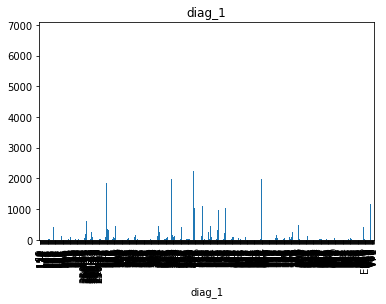

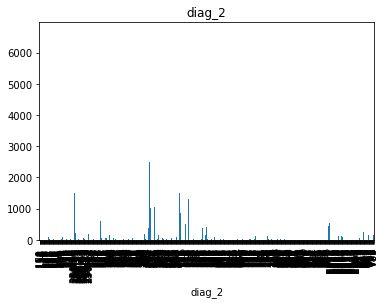

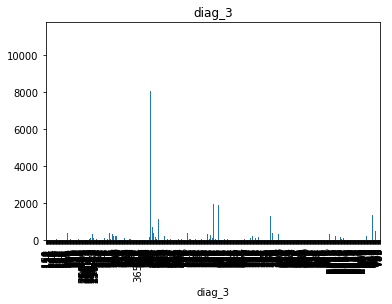

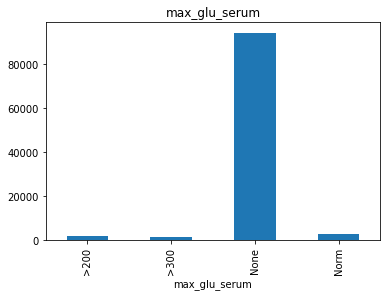

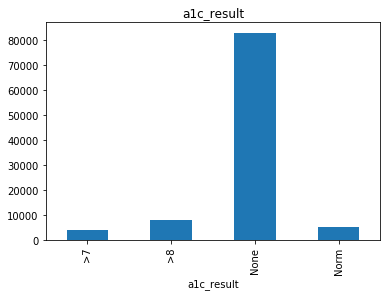

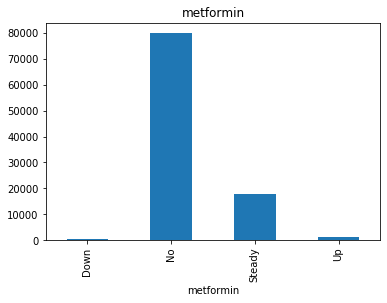

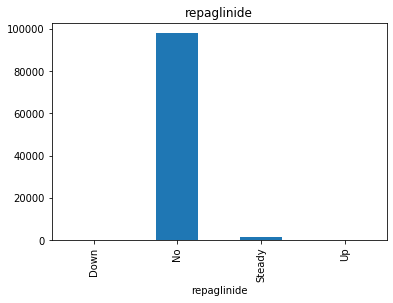

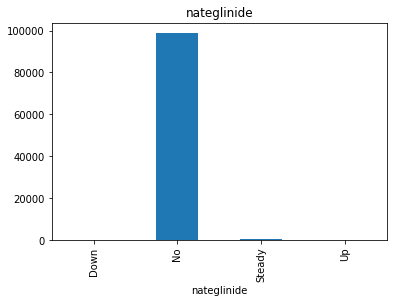

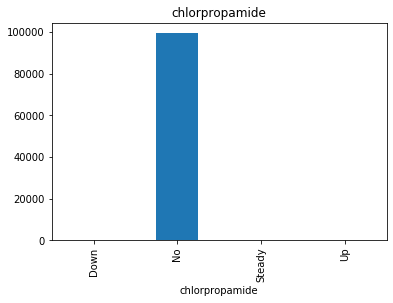

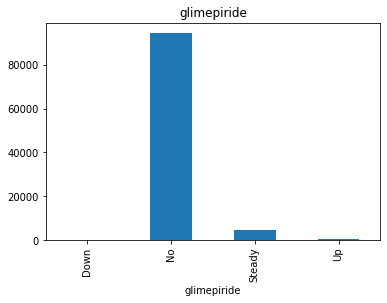

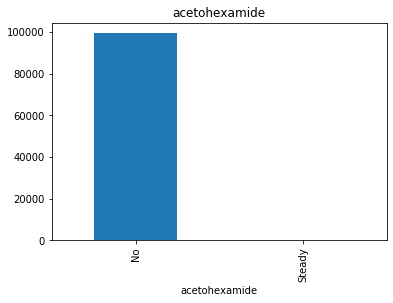

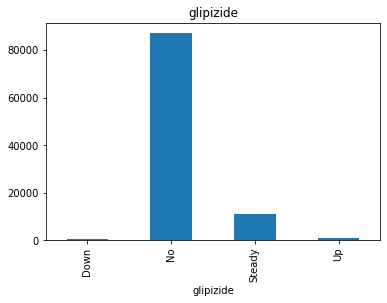

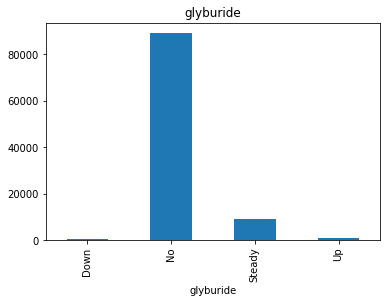

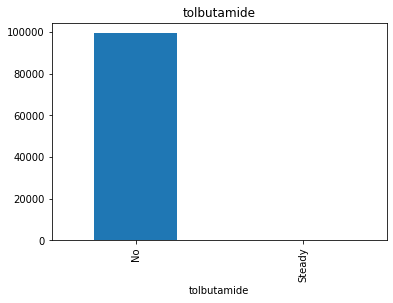

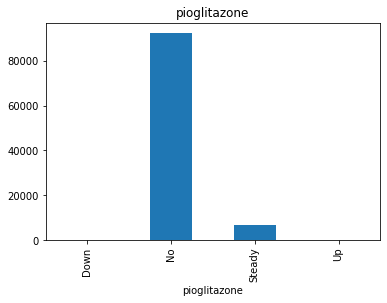

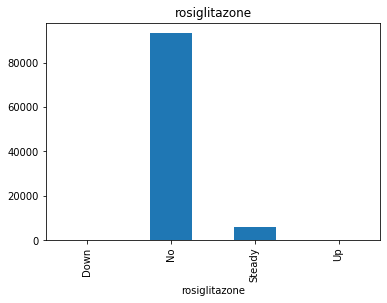

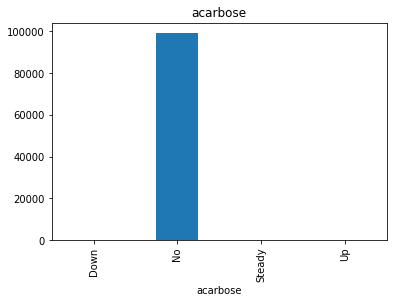

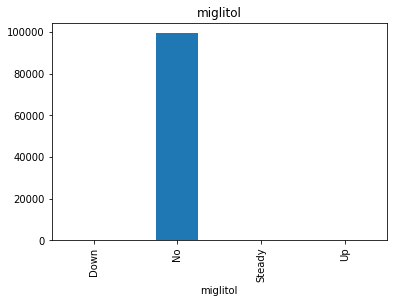

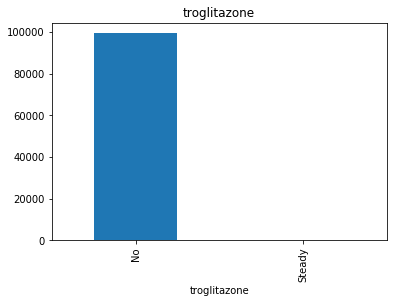

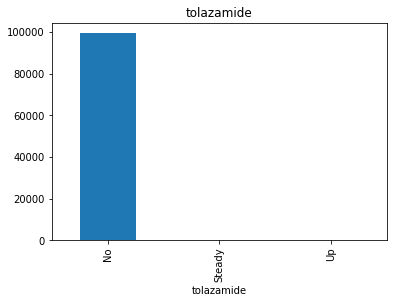

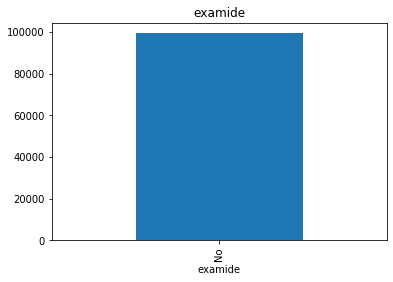

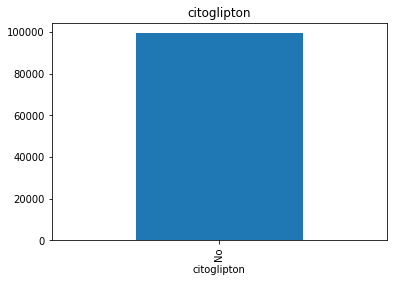

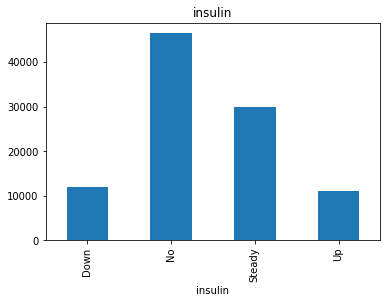

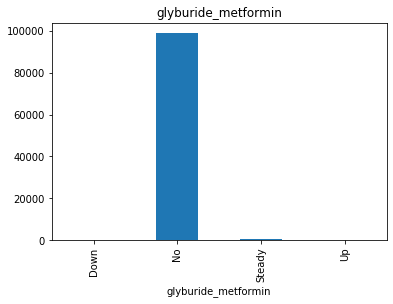

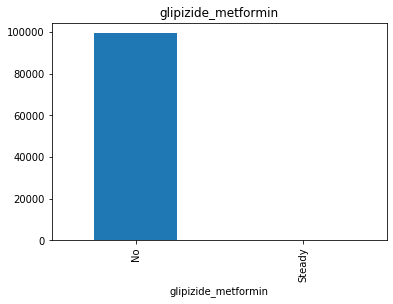

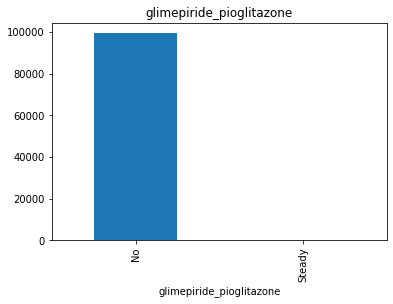

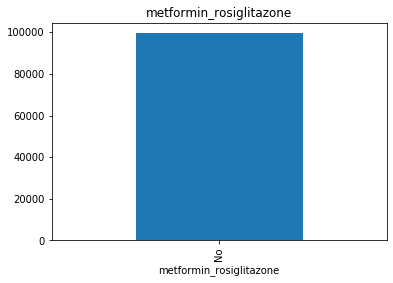

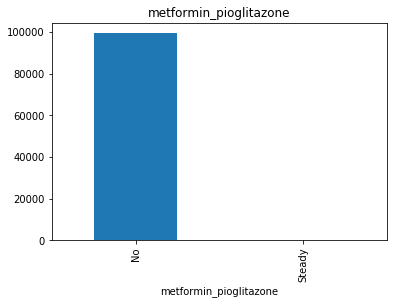

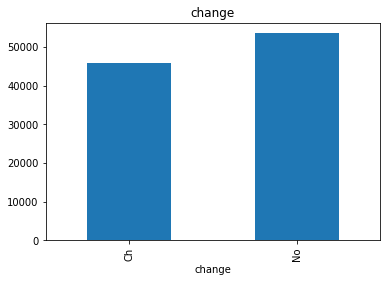

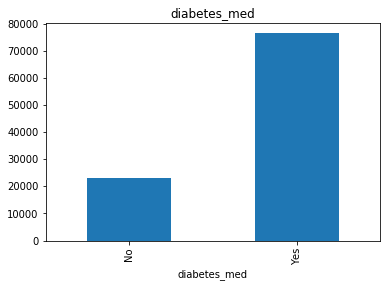

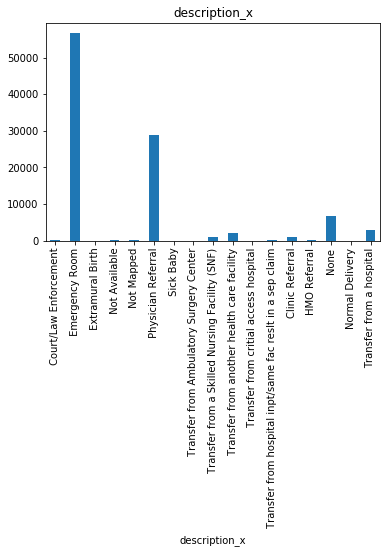

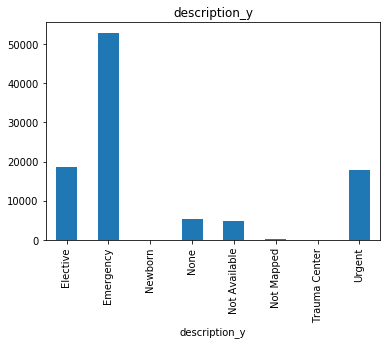

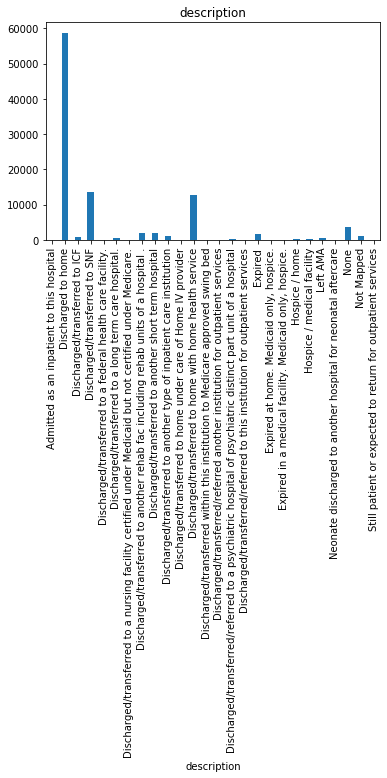

In [40]:
#Columnas categoricas
for x in columnsString:
  plt.title(x)
  bd_full.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

In [41]:
#Retiramos las variables diag_1 diag_2 diag_3
columnsNumeric.append("diag_1")
columnsNumeric.append("diag_2")
columnsNumeric.append("diag_3")

columnsString.remove("diag_1")
columnsString.remove("diag_2")
columnsString.remove("diag_3")

*Se observa que las variables diag_1, diag_2 y diag_3 son en su mayoria numéricas, revisamos el porcentaje de numéricas, no numericas y nulos.*

In [42]:
def changeType(x):
  try:
    a = float(x)
    if(np.isnan(a)):
      return -1
    else:
      return 1
  except:
    return 0
  
def diagToNumber(x):
  try:
    a = float(x)
    if(np.isnan(a)):
      return float("nan")
    else:
      return a
  except:
    return float("nan")

In [43]:
for x in ["diag_1", "diag_2", "diag_3"]:
  numNumeric = bd_full[bd_full[x].apply(changeType) == 1].shape[0]
  numString = bd_full[bd_full[x].apply(changeType) == 0].shape[0]
  numNull = bd_full[bd_full[x].apply(changeType) == -1].shape[0]
  print(x)
  print("Numeros: " + str(np.round(numNumeric / bd_full.shape[0] * 100, 2)) + "%")
  print("String: " + str(np.round(numString / bd_full.shape[0] * 100, 2)) + "%")
  print("Nulos: " + str(np.round(numNull / bd_full.shape[0] * 100, 2)) + "%")
  print("\n")

diag_1
Numeros: 98.36%
String: 1.64%
Nulos: 0.0%


diag_2
Numeros: 97.14%
String: 2.86%
Nulos: 0.0%


diag_3
Numeros: 93.64%
String: 6.36%
Nulos: 0.0%




*Todos los numéricos son mayores a 90%, tomamos estos para transformar a numéricas estas variables*

In [44]:
for x in ["diag_1", "diag_2", "diag_3"]:
  bd_full[x] = bd_full[x].apply(diagToNumber)
  bd_full[x] = bd_full[x].apply(float)

*Transformamos las variables categoricas para que puedan ser leidas*

In [45]:
#Como el porcentaje de nan es menor al 1% eliminamos los casos perdidos para un mejor ajuste
bd_full =  bd_full.dropna()

In [46]:
bd_full.shape

(89781, 51)

In [47]:
#===================================================================
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [48]:
bd_full.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetes_med,readmitted,description_x,description_y,description,target
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home,1
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,Yes,>30,Clinic Referral,Urgent,Discharged to home,1
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,Yes,>30,Emergency Room,Emergency,Discharged to home,1


In [49]:
le = preprocessing.LabelEncoder()

In [50]:
for x in columnsString:
    le.fit(bd_full[x])
    le.transform(bd_full[x]) 
    bd_full[x + '_D'] = le.transform(bd_full[x])

In [51]:
columnsString_D = ['race_D', 'gender_D', 'age_D', 'max_glu_serum_D', 'a1c_result_D', 'metformin_D', 'repaglinide_D', 'nateglinide_D',
 'chlorpropamide_D', 'glimepiride_D', 'acetohexamide_D', 'glipizide_D', 'glyburide_D', 'tolbutamide_D', 'pioglitazone_D', 'rosiglitazone_D',
 'acarbose_D', 'miglitol_D', 'troglitazone_D', 'tolazamide_D', 'examide_D', 'citoglipton_D', 'insulin_D', 'glyburide_metformin_D',
 'glipizide_metformin_D', 'glimepiride_pioglitazone_D', 'metformin_rosiglitazone_D', 'metformin_pioglitazone_D', 'change_D',
 'diabetes_med_D', 'description_x_D', 'description_y_D', 'description_D']

In [52]:
bd_full.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide_metformin_D,glipizide_metformin_D,glimepiride_pioglitazone_D,metformin_rosiglitazone_D,metformin_pioglitazone_D,change_D,diabetes_med_D,description_x_D,description_y_D,description_D
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,1,0,0,0,0,0,1,1,1,1
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,1,0,0,0,0,0,1,1,1,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,1,0,0,0,0,0,1,1,1,1
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,1,0,0,0,0,1,1,11,7,1
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,1,0,0,0,0,1,1,1,1,1


**5. Generamos nuestra base modeler**

In [53]:
columnsEvaluar = columnsNumeric + columnsString_D
columnsFin = columnsNumeric + columnsString_D + ["target"]
bd_modeler = bd_full[columnsFin]

**6. Particionado de datos: train y Test**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = bd_modeler[columnsEvaluar]
y = bd_modeler[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [56]:
pdX_train = pd.DataFrame(X_train, columns = columnsEvaluar)
pdy_train = pd.DataFrame(y_train, columns = ["target"])
pdX_test = pd.DataFrame(X_test, columns = columnsEvaluar)
pdy_test = pd.DataFrame(y_test, columns = ["target"])

Regresión logistica

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
clasificador = LogisticRegression()
clasificador.fit(pdX_train[columnsEvaluar], y_train) 

C:\Users\Administrativo\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Administrativo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [59]:
# Predecir con el algoritmo entrenado
Y_pred_train = clasificador.predict(X_train)
Y_pred_test = clasificador.predict(X_test)

In [60]:
#Matriz de confusión
print('Train:','\n',confusion_matrix(y_train, Y_pred_train),'\n')
print('Test:','\n',confusion_matrix(y_test, Y_pred_test))

Train: 
 [[28789  9567]
 [18547 14921]] 

Test: 
 [[7216 2331]
 [4791 3619]]


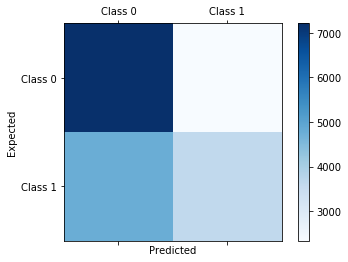

In [61]:
# Visualizando la matriz de confusión
conf_mat = confusion_matrix(y_test, Y_pred_test)
labels = ['Class 0', 'Class 1']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [62]:
prediction_train = clasificador.score(pdX_train[columnsEvaluar], y_train)
prediction_test = clasificador.score(pdX_test[columnsEvaluar], y_test)

In [63]:
print(prediction_train)
print(prediction_test)

0.6085709512140789
0.6033858662360082


Arboles de Decisiones

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
clasificador2 = DecisionTreeClassifier(max_depth = 40)
clasificador2.fit(pdX_train[columnsEvaluar], y_train)

DecisionTreeClassifier(max_depth=40)

In [66]:
# Predecir con el algoritmo entrenado
Y_pred_train2 = clasificador2.predict(X_train)
Y_pred_test2 = clasificador2.predict(X_test)

In [67]:
#Matriz de confusión
print('Train:','\n',confusion_matrix(y_train, Y_pred_train2),'\n')
print('Test:','\n',confusion_matrix(y_test, Y_pred_test2))

Train: 
 [[38343    13]
 [   35 33433]] 

Test: 
 [[5514 4033]
 [4005 4405]]


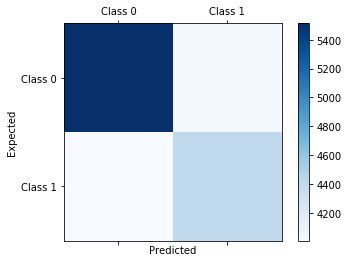

In [68]:
# Visualizando la matriz de confusión
conf_mat = confusion_matrix(y_test, Y_pred_test2)
labels = ['Class 0', 'Class 1']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [69]:
prediction2_train = clasificador2.score(pdX_train[columnsEvaluar], y_train)
prediction2_test = clasificador2.score(pdX_test[columnsEvaluar], y_test)
print(prediction2_train)
print(prediction2_test)

0.9993316997104033
0.5523751183382525


Modelo GBoosting

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [71]:
clasificador3 = GradientBoostingClassifier(n_estimators=200, max_depth = 4, learning_rate = .4)
clasificador3.fit(pdX_train[columnsEvaluar], pdy_train)

C:\Users\Administrativo\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(learning_rate=0.4, max_depth=4, n_estimators=200)

In [72]:
# Predecir con el algoritmo entrenado
Y_pred_train3 = clasificador3.predict(X_train)
Y_pred_test3 = clasificador3.predict(X_test)

In [73]:
#Matriz de confusión
print('Train:','\n',confusion_matrix(y_train, Y_pred_train3),'\n')
print('Test:','\n',confusion_matrix(y_test, Y_pred_test3))

Train: 
 [[29172  9184]
 [12208 21260]] 

Test: 
 [[6764 2783]
 [3692 4718]]


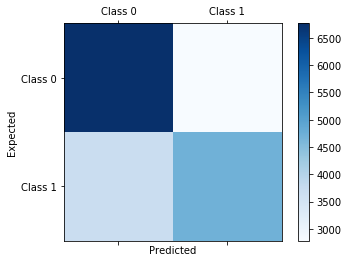

In [74]:
# Visualizando la matriz de confusión
conf_mat = confusion_matrix(y_test, Y_pred_test3)
labels = ['Class 0', 'Class 1']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [75]:
prediction3_train = clasificador3.score(pdX_train[columnsEvaluar], pdy_train)
prediction3_test = clasificador3.score(pdX_test[columnsEvaluar], pdy_test)

In [76]:
print(prediction3_train)
print(prediction3_test)

0.7021608376030296
0.6394163835830038


Gracias!!